In [1]:
# 导入 TensorFlow
import tensorflow as tf
# 使用 即显模式
tf.enable_eager_execution()

# 训练集
n_example = 100
train_x = tf.random_normal([n_example])
train_noise = tf.random_normal([n_example])
train_y = train_x * 3 + 2 + train_noise

# 测试集
n_example = 10
test_x = tf.random_normal([n_example])
test_noise = tf.random_normal([n_example])
test_y = test_x * 3 + 2 + test_noise

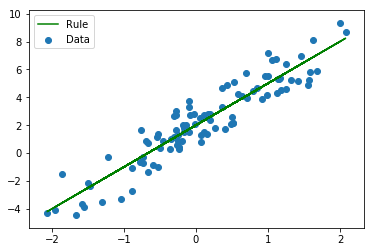

In [3]:
# 显示训练集
import matplotlib.pyplot as plt
plt.plot(train_x, train_y - train_noise, color = 'green')
plt.scatter(train_x, train_y)
plt.legend(['Rule','Data'])
plt.show()

In [4]:
import plotly
import plotly.graph_objs as go
import numpy as np
# Data
trace1 = go.Scatter(x = train_x.numpy(), y = train_y.numpy(),
    mode = 'markers', name = 'Data')
# Rule
trace2 = go.Scatter(x = train_x.numpy(), y = train_y.numpy() - train_noise.numpy(),
    mode = 'lines', name = 'Rule')

data = [trace1,trace2]
# Plot and embed in ipython notebook!
plotly.plotly.iplot(data, filename='LR_Data')

In [5]:
# 训练集的均值和标准差
MEAN_X = np.mean(train_x)
STD_X = np.std(train_x)
MEAN_Y = np.mean(train_y)
STD_Y = np.std(train_y)

# 标准化训练集和测试集
norm_train_x = (train_x - MEAN_X)/STD_X
norm_train_y = (train_y - MEAN_Y)/STD_Y
norm_test_x = (test_x - MEAN_X)/STD_X
norm_test_y = (test_y - MEAN_Y)/STD_Y

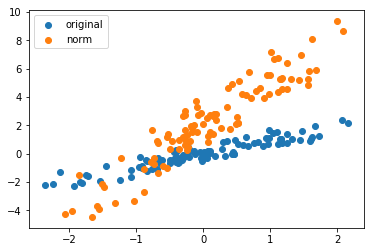

In [6]:
# 显示原始数据和标准化数据
plt.scatter(norm_train_x, norm_train_y)
plt.scatter(train_x, train_y)
plt.legend(['original','norm'])

In [7]:
# 原始数据
trace1 = go.Scatter(x = train_x.numpy(), y = train_y.numpy(),
    mode = 'markers', name = 'Original')
# Rule
trace2 = go.Scatter(x = norm_train_x.numpy(), y = norm_train_y.numpy(),
    mode = 'markers', name = 'Standardization')

data = [trace1,trace2]
# Plot and embed in ipython notebook!
plotly.plotly.iplot(data, filename='Standardization')

In [8]:
import tensorflow.contrib.eager as tfe
# 定义模型
class Model(object):
    def __init__(self):
        # 参数
        # 初始化：随便给 参数 W 和 b 两个值
        self.W = tfe.Variable(1.0)
        self.b = tfe.Variable(1.0)
    
    def __call__(self, x):
        # 正向传递
        # 如何利用 参数 W 和 b 运算
        y = self.W * x + self.b
        return y
# 实例模型
model = Model()

Epoch: 000 | Loss: 5.160 | W: 1.149 | b: 1.103
Epoch: 001 | Loss: 4.523 | W: 1.287 | b: 1.197
Epoch: 002 | Loss: 3.983 | W: 1.416 | b: 1.283
Epoch: 003 | Loss: 3.526 | W: 1.536 | b: 1.361
Epoch: 004 | Loss: 3.138 | W: 1.647 | b: 1.433
Epoch: 005 | Loss: 2.810 | W: 1.750 | b: 1.499
Epoch: 006 | Loss: 2.533 | W: 1.847 | b: 1.559
Epoch: 007 | Loss: 2.299 | W: 1.936 | b: 1.614
Epoch: 008 | Loss: 2.101 | W: 2.019 | b: 1.664
Epoch: 009 | Loss: 1.934 | W: 2.097 | b: 1.710
Epoch: 010 | Loss: 1.793 | W: 2.169 | b: 1.752
Epoch: 011 | Loss: 1.675 | W: 2.236 | b: 1.791
Epoch: 012 | Loss: 1.576 | W: 2.298 | b: 1.826
Epoch: 013 | Loss: 1.493 | W: 2.356 | b: 1.858
Epoch: 014 | Loss: 1.423 | W: 2.410 | b: 1.887
Epoch: 015 | Loss: 1.365 | W: 2.460 | b: 1.913
Epoch: 016 | Loss: 1.316 | W: 2.507 | b: 1.938
Epoch: 017 | Loss: 1.276 | W: 2.550 | b: 1.960
Epoch: 018 | Loss: 1.243 | W: 2.590 | b: 1.980
Epoch: 019 | Loss: 1.215 | W: 2.628 | b: 1.998
Epoch: 020 | Loss: 1.193 | W: 2.663 | b: 2.015
Epoch: 021 | 

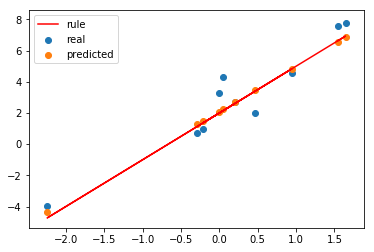

In [9]:
# 误差函数
def loss(prediction, label):
    loss = tf.reduce_mean(tf.square(prediction - label))
    return loss

# 更新方式
def train(model, x, y, learning_rate, batch_size, epoch):
    # 更新次数
    for e in range(epoch):
        # 批量更新
        for b in range(0,len(x.numpy()),batch_size):
            # 计算梯度
            with tf.GradientTape() as tape:
                loss_value = loss(model(x[b:b+batch_size]), y[b:b+batch_size])
                dW, db = tape.gradient(loss_value, [model.W, model.b])
            # 训练更新
            model.W.assign_sub(dW * learning_rate)
            model.b.assign_sub(db * learning_rate)
        # 显示
        print("Epoch: %03d | Loss: %.3f | W: %.3f | b: %.3f" %(e, loss(model(x), y), model.W.numpy(), model.b.numpy()))

# 训练
train(model, train_x, train_y, learning_rate = 0.01, batch_size = 32, epoch = 30)

# 评估
test_p = model(test_x)
print("Final Test Loss: %s" %loss(test_p, test_y).numpy())

# 可视化
plt.plot(test_x,test_y-test_noise,color='red')
plt.scatter(test_x,test_y)
plt.scatter(test_x,test_p)
plt.legend(['rule','real','predicted'])

# 预测
test_p = model([1,2])
print(test_p.numpy())